<a href="https://colab.research.google.com/github/sirius70/NLP_HW1/blob/main/token_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Empirical Regularities of Language

In this first homework assignment, you will familiarize yourself with some empirical regularities of natural language, Shannon entropy and Zipf's Law.

Read through this Jupyter notebook and fill in the parts marked with `TODO`. When you're ready to submit, print the notebook as a PDF and upload to Gradescope.

## Shannon Entropy

Shannon borrowed the concept of entropy from statistical physics to develop _information theory_, focused on encoding and compressing messages. A few years later, in 1950, he applied information theory to analyze human predictive ability—in other words, the entropy of the human language model. You can read the original article, [Prediction and Entropy of Printed English](https://languagelog.ldc.upenn.edu/myl/Shannon1950.pdf), for more details.

Your first task is to collect data on how predictable different letters are in an English sentence, depending on how much context in a word or sentence you have.

Go to the [Shannon game page](https://www.ccs.neu.edu/home/dasmith/courses/cs6120/shannon/) that we demonstrated in class. We already guessed part of Text 1, so work through Texts 2, 3, and 4.

In [1]:
# TODO: Enter the arrays of numbers of guesses for Texts 2, 3, and 4 here.
text2_guesses = [13, 6,	5, 3, 1, 1, 1, 1, 9, 2, 2, 1, 1, 2, 1, 1, 2, 1, 11, 3, 4, 2, 1, 1, 1, 1, 1, 8, 4, 3, 2, 1, 10, 1, 1, 1, 1, 6, 5, 5, 1, 1, 1, 1, 1, 1, 1]

text3_guesses = [1, 3, 1, 9, 5,	2, 1, 1, 8, 3, 1, 1, 1,	1, 1, 1, 1, 1, 1, 1, 3,	1, 1, 1, 1, 16, 2, 11, 1, 1, 1, 1, 1, 1, 1, 7, 2, 2, 1, 1, 1, 7, 4, 1, 5, 4, 7, 1, 4, 1, 1, 1, 3, 2, 1, 5, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1]

text4_guesses = [2, 1, 5, 1, 1,	8, 3, 2, 2, 3, 1, 1, 1,	1, 1, 7, 4, 3, 1, 1, 1,	1, 1, 1, 1, 1, 2, 3, 1, 1, 7, 1, 13, 5, 5, 1, 1, 1, 1, 18, 2, 5, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1]


Rearrange the guess data into a two-dimensional array, relating number of characters of context (0, 1, 2, ...) to number of guesses required.

In other words, you might look in cell (2, 1) and read "2" if the number of times it took one guess to get the right letter with two characters of context was 2.

In [5]:
# TODO: Create array of counts of guesses. Print out the array so we can see it.
import numpy as np

def build_matrix(*texts, max_guess=27):
    max_context = max(len(t) for t in texts) - 1
    matrix = np.zeros((max_context + 1, max_guess + 1), dtype=int)

    for context in range(max_context + 1):
        for t in texts:
            if context < len(t):
                guess = t[context]
                if 0 <= guess <= max_guess:
                    matrix[context, guess] += 1
    return matrix

# Build the matrix from all texts
combined_matrix = build_matrix(text2_guesses, text3_guesses, text4_guesses)

# Print results
np.set_printoptions(threshold=np.inf)
print("Combined Context-Guess Matrix")
print(f"Shape: {combined_matrix.shape} (rows = context length, cols = guesses)")
print(combined_matrix)



Combined Context-Guess Matrix
Shape: (67, 28) (rows = context length, cols = guesses)
[[0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 1 0 0 0 0 0 0

Now you can compute Shannon's upper and lower bounds on the entropy of your predictive distribution for English. The upper bound, as a function of the number of context characters $N$, is just the Shannon entropy of the distribution of numbers of guesses. In other words, it's the entropy of the original text as &ldquo;reduced&rdquo; by the human encoder to a sequence of numbers of guesses.

$F_N = -\sum_{i=1}^{27} q_i^N \log_2 q_i^N$

where $q_i^N$ is the number of times you took $i$ guesses with $N$ characters of context, i.e., one of the cells in the table you computed. The number of guesses ranges from 1 to 27 since we restrict ourselves to 26 letters plus space. In computing entropy, we define $0 \log 0 = 0$.

In [8]:
# TODO: Compute the upper bound for each amount of context N and print it out.

import numpy as np

def compute_upper_bounds(res_matrix):
    results = []
    for context in range(res_matrix.shape[0]):
        counts = res_matrix[context, 1:28]   # ignore guess=0
        total = np.sum(counts)
        if total > 0:
            probabilities = counts / total
            # skip zero probabilities
            entropy = -np.sum(probabilities[probabilities > 0] * np.log2(probabilities[probabilities > 0]))
        else:
            entropy = 0.0
        results.append((context, int(total), entropy))
    return results


upper_bounds = compute_upper_bounds(combined_matrix)

# Print Results
print("Context | Total Counts | F^N (bits)")
print("-----------------------------------")
for context, total, entropy in upper_bounds:
    print(f"{context:7d} | {total:12d} | {entropy:.6f}")



Context | Total Counts | F^N (bits)
-----------------------------------
      0 |            3 | 1.584963
      1 |            3 | 1.584963
      2 |            3 | 0.918296
      3 |            3 | 1.584963
      4 |            3 | 0.918296
      5 |            3 | 1.584963
      6 |            3 | 0.918296
      7 |            3 | 0.918296
      8 |            3 | 1.584963
      9 |            3 | 0.918296
     10 |            3 | 0.918296
     11 |            3 | -0.000000
     12 |            3 | -0.000000
     13 |            3 | 0.918296
     14 |            3 | -0.000000
     15 |            3 | 0.918296
     16 |            3 | 1.584963
     17 |            3 | 0.918296
     18 |            3 | 0.918296
     19 |            3 | 0.918296
     20 |            3 | 1.584963
     21 |            3 | 0.918296
     22 |            3 | -0.000000
     23 |            3 | -0.000000
     24 |            3 | -0.000000
     25 |            3 | 0.918296
     26 |            3 | 0.918296
    

Shannon derived a lower bound on entropy from the guess data as

$\sum_{i=1}^{27} i(q_i^N - q_{i+1}^N) \log_2 i$

In [9]:
# TODO: Compute thew lower bound for each amount of context N and print it out.
import numpy as np

def compute_lower_bounds(res_matrix):
    results = []
    for context in range(res_matrix.shape[0]):
        q = res_matrix[context, 1:28]  # guesses 1..27
        if np.sum(q) > 0:
            lower = 0.0
            for i in range(1, 28):  # i = 1..27
                q_i = q[i-1]
                q_i1 = q[i] if i < 27 else 0
                diff = q_i - q_i1
                if diff != 0:
                    lower += i * diff * np.log2(i)
        else:
            lower = 0.0
        results.append((context, int(np.sum(q)), lower))
    return results

lower_bounds = compute_lower_bounds(combined_matrix)

# Print results
print("Context | Total Counts | L^N (bits)")
print("-----------------------------------")
for context, total, lower in lower_bounds:
    print(f"{context:7d} | {total:12d} | {lower:.6f}")


Context | Total Counts | L^N (bits)
-----------------------------------
      0 |            3 | 7.086166
      1 |            3 | 6.655022
      2 |            3 | 7.219281
      3 |            3 | 7.284213
      4 |            3 | 3.609640
      5 |            3 | 6.348516
      6 |            3 | 2.754888
      7 |            3 | 2.000000
      8 |            3 | 10.877841
      9 |            3 | 7.509775
     10 |            3 | 2.000000
     11 |            3 | 0.000000
     12 |            3 | 0.000000
     13 |            3 | 2.000000
     14 |            3 | 0.000000
     15 |            3 | 4.141709
     16 |            3 | 5.245112
     17 |            3 | 2.754888
     18 |            3 | 4.834467
     19 |            3 | 2.754888
     20 |            3 | 6.000000
     21 |            3 | 2.000000
     22 |            3 | 0.000000
     23 |            3 | 0.000000
     24 |            3 | 0.000000
     25 |            3 | 5.396641
     26 |            3 | 4.000000
     27 |

## Zipf's Law

Now let's look at some text data directly to see the skewed distribution of tokens predicted by Zipf's Law. Recall that Zipf's law states that a word's rank (from the most common word at rank 1 on down) to its frequency is approximately a constant, i.e., $r \cdot f = k$. Equivalently, we can divide both sides by the total number of tokens $N$ to get $r \cdot P_r = c$, where $c = k/N$ and $P_r = f/N$ is the _relative frequency_ of word $r$.

We start by downloading a sample of 1000 open-access English books from [Project Gutenberg](https://gutenberg.org/).

In [10]:
# If your local environment doesn't have the wget command,
# you can comment this out and download it manually.
!wget "http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz"

--2025-09-19 01:01:50--  http://khoury.northeastern.edu/home/dasmith/pg-sample.json.gz
Resolving khoury.northeastern.edu (khoury.northeastern.edu)... 52.70.229.197
Connecting to khoury.northeastern.edu (khoury.northeastern.edu)|52.70.229.197|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150984197 (144M) [application/x-gzip]
Saving to: ‘pg-sample.json.gz.1’

pg-sample.json.gz.1 100%[===================>] 143.99M  99.7MB/s    in 1.4s    

2025-09-19 01:01:51 (99.7 MB/s) - ‘pg-sample.json.gz.1’ saved [150984197/150984197]



The file is compressed with gzip and is in a JSON lines format. Each line is one JSON record, which we parse with the `json` library.

Here we print out the keys in the first record: `id`, `author`, `title`, and `text`.

In [11]:
import gzip, json
for line in gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8"):
  rec = json.loads(line)
  print(rec.keys())
  print(rec['author'])
  print(rec['title'])
  print(rec['text'][0:100])
  break

dict_keys(['id', 'author', 'title', 'text'])
Jefferson, Thomas
The Declaration of Independence of the United States of America


This is a retranscription of one of the first Project
Gutenberg Etexts, offically dated December 3


Your task now is to **tokenize** the text in the `text` field of each record into an array of words. Later on in this course, we will discuss learning better tokenizers. For now, you should separate words on whitespace (space, newline, tab) and punctuation. Convert the tokens to lower case, and keep only those tokens that have at least one letter a-z in them. In general, numerals in text tend not to follow Zipf's law but [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law).

You might use _regular expressions_ (e.g., the `re.split` function) to help with tokenization and filtering.

After you have tokenized, compute $N$, the total number of tokens in the corpus and print it out.

In [1]:
# TODO: Compute an array of tokens in the corpus
# Compute the total number of tokens N and print it out.

import gzip
import json
import re

all_tokens = []

with gzip.open("pg-sample.json.gz", mode="rt", encoding="utf-8") as f:
    for line in f:
        rec = json.loads(line)
        text = rec['text']

        # Split into tokens
        tokens = re.split(r'[\s\W_]+', text)

        # Convert to lowercase and keep only tokens with at least one letter
        tokens = [t.lower() for t in tokens if re.search(r'[a-z]', t)]

        all_tokens.extend(tokens)

N = len(all_tokens)

print("Total tokens in corpus:", N)


Total tokens in corpus: 68003466


Now, count the frequency each unigram (distinct word) in the corpus and sort them in an array in descending order of frequency. The first item in your array should be the most common word. Print out that word and its frequency

In [13]:
# TODO: Compute an arrary of unigrams in descending order of frequency.
# Print the most common word and its frequency.

from collections import Counter

# Count frequencies of each unigram
unigram_counts = Counter(all_tokens)

# Sort unigrams in descending order of frequency
sorted_unigrams = unigram_counts.most_common()

# Get the most common word and its frequency
most_common_word, most_common_freq = sorted_unigrams[0]

print("Most common word:", most_common_word)
print("Frequency:", most_common_freq)


Most common word: the
Frequency: 4440562


Now, you can look at the Zipf's law relationship between rank and relative frequency (i.e., frequency divided by $N$). Plot the data using a python graphing package such as matplotlib, plotly, or plotnine. This doesn't have to be a fancy graph, so use whatever you're familiar with. Both axes should be on a log scale. If your package doesn't support log scales, you can take the log of the rank and relative frequency yourself before plotting. Recall that since python arrays are zero-indexed, the rank 1 word will be element 0 of your sorted array.

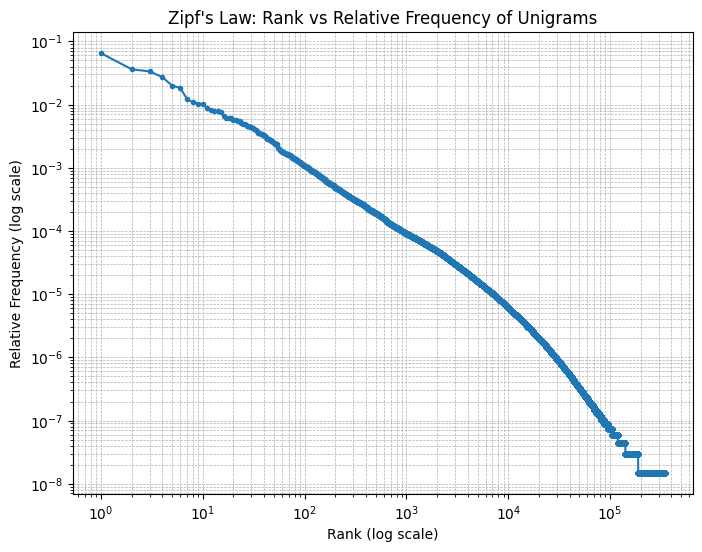

In [14]:
# TODO: Plot rank vs. relative frequency of unigrams.

import matplotlib.pyplot as plt
import numpy as np

# Compute ranks
ranks_unigram = np.arange(1, len(sorted_unigrams) + 1)

# Compute relative frequencies
freqs_unigram = np.array([freq / N for _, freq in sorted_unigrams])

# Plot
plt.figure(figsize=(8,6))
plt.loglog(ranks_unigram, freqs_unigram, marker=".")
plt.xlabel("Rank (log scale)")
plt.ylabel("Relative Frequency (log scale)")
plt.title("Zipf's Law: Rank vs Relative Frequency of Unigrams")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Now, take your array of tokens and compute the counts of both the bigrams and trigrams and sort them in descending order of frequency. Print out the most common bigram and trigram.

Most common word: ('of', 'the')
Frequency: 658055


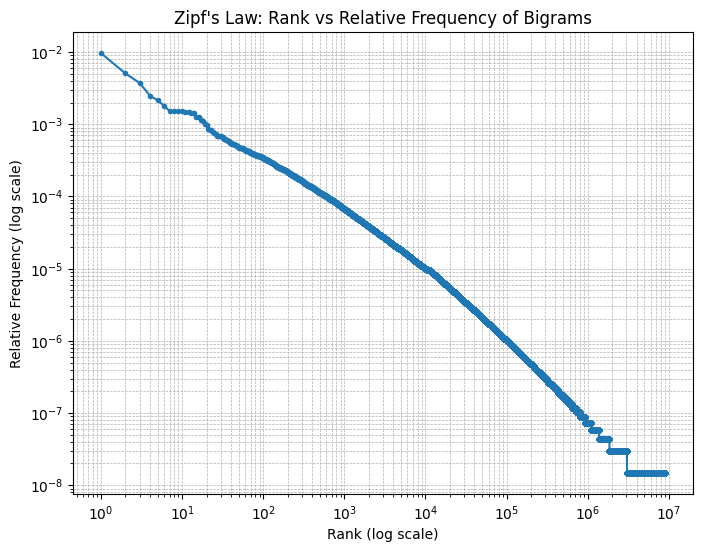

In [3]:
# TODO: Compute sorted bigram statistics.
# Print out the most common bigram.
# Plot rank vs. relative frequency for bigrams.
# You may make separate plots or put them on the same plot and label them.

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Bigrams
bigrams = [(all_tokens[i], all_tokens[i+1]) for i in range(len(all_tokens)-1)]
bigram_counts = Counter(bigrams)
sorted_bigrams = bigram_counts.most_common()

# Compute relative frequencies
N = len(all_tokens)

ranks_bigram = np.arange(1, len(sorted_bigrams) + 1)
freqs_bigram = np.array([f/(N-1) for _, f in sorted_bigrams])

# Get the most common word and its frequency
most_common_word, most_common_freq = sorted_bigrams[0]

print("Most common word:", most_common_word)
print("Frequency:", most_common_freq)

# Plot
plt.figure(figsize=(8,6))
plt.loglog(ranks_bigram, freqs_bigram, marker=".")

plt.xlabel("Rank (log scale)")
plt.ylabel("Relative Frequency (log scale)")
plt.title("Zipf's Law: Rank vs Relative Frequency of Bigrams")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


In [2]:
# TODO: Compute sorted trigram statistics.
# Print out the most common trigram.

from collections import Counter
import numpy as np

# Trigrams Generator
def trigram_generator(tokens):
    for i in range(len(tokens) - 2):
        yield (tokens[i], tokens[i+1], tokens[i+2])

# Count trigrams using the generator
trigram_counts = Counter(trigram_generator(all_tokens))
sorted_trigrams = trigram_counts.most_common()

# Get the most common word and its frequency
most_common_trigram, most_common_freq = sorted_trigrams[0]

print("Most common trigram:", most_common_trigram)
print("Frequency:", most_common_freq)


Most common trigram: ('one', 'of', 'the')
Frequency: 21774


In [1]:
# Plot rank vs. relative frequency for trigrams.

import matplotlib.pyplot as plt

# Compute relative frequencies
N = len(all_tokens)

ranks_trigram = np.arange(1, len(sorted_trigrams) + 1)
freqs_trigram = np.array([f/(N-2) for _, f in sorted_trigrams])

# Plot
plt.figure(figsize=(8,6))
plt.loglog(ranks_trigram, freqs_trigram, marker=".")

plt.xlabel("Rank (log scale)")
plt.ylabel("Relative Frequency (log scale)")
plt.title("Zipf's Law: Rank vs Relative Frequency of Trigrams")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


NameError: name 'all_tokens' is not defined

**TODO**: Finally, write your visual impressions of the fit of the unigram, bigram, and trigram distributions. This doesn't need to be statistically rigorous.